In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/yunsu/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/yunsu/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in  enumerate(sequences):
        results[i,sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [3]:
from tensorflow.keras.utils import to_categorical

# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, labels] = 1.
#     return results

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape = (10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
one_hot_train_labels = one_hot_train_labels[1000:]

history = model.fit(x_train, one_hot_train_labels, epochs=10, batch_size = 512, validation_data = (x_val, y_val))

Train on 2982 samples, validate on 1000 samples
Epoch 1/10
2982/2982 [==============================] - 1s 261us/sample - loss: 3.8255 - accuracy: 0.0912 - val_loss: 3.8208 - val_accuracy: 0.3850
Epoch 2/10
2982/2982 [==============================] - 0s 78us/sample - loss: 3.8178 - accuracy: 0.3498 - val_loss: 3.8130 - val_accuracy: 0.3850
Epoch 3/10
2982/2982 [==============================] - 0s 77us/sample - loss: 3.8101 - accuracy: 0.2931 - val_loss: 3.8053 - val_accuracy: 0.3850
Epoch 4/10
2982/2982 [==============================] - 0s 75us/sample - loss: 3.8024 - accuracy: 0.3199 - val_loss: 3.7976 - val_accuracy: 0.3850
Epoch 5/10
2982/2982 [==============================] - 0s 75us/sample - loss: 3.7947 - accuracy: 0.3498 - val_loss: 3.7899 - val_accuracy: 0.3850
Epoch 6/10
2982/2982 [==============================] - 0s 78us/sample - loss: 3.7871 - accuracy: 0.3498 - val_loss: 3.7822 - val_accuracy: 0.3850
Epoch 7/10
2982/2982 [==============================] - 0s 78us/sampl

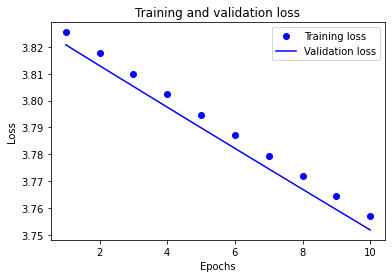

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()